In [27]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import sys
sys.path.append('../')

from src.algo.pg import PGAgent
from src.envs.pendulum import InvPendulumLinEnvPartialNorm

In [34]:
# rnn_path = '../data/pendulum_partial_norm_rnn_06-05-2022_13-28-32/2/'
rnn_path = '../data/pendulum_partial_norm_rnn_07-05-2022_11-57-10/2/'

agent = PGAgent.load(rnn_path)
agent.rnn, agent.mlp

(RobRNNActor(
   (_W_xi): Linear(in_features=33, out_features=16, bias=False)
   (_W_u): Linear(in_features=33, out_features=1, bias=False)
   (_W_v): Linear(in_features=17, out_features=16, bias=False)
 ),
 MLPCritic(
   (_in_lin): Linear(in_features=1, out_features=16, bias=True)
   (_hidden_layers): ModuleList(
     (0): Linear(in_features=16, out_features=16, bias=True)
   )
   (_out_lin): Linear(in_features=16, out_features=1, bias=True)
 ))

In [35]:
env = InvPendulumLinEnvPartialNorm(
    factor=1e-1,
    # max_torque=10000,
)
env.max_torque = 10_000
env

100%|██████████| 11/11 [00:08<00:00,  1.23it/s]


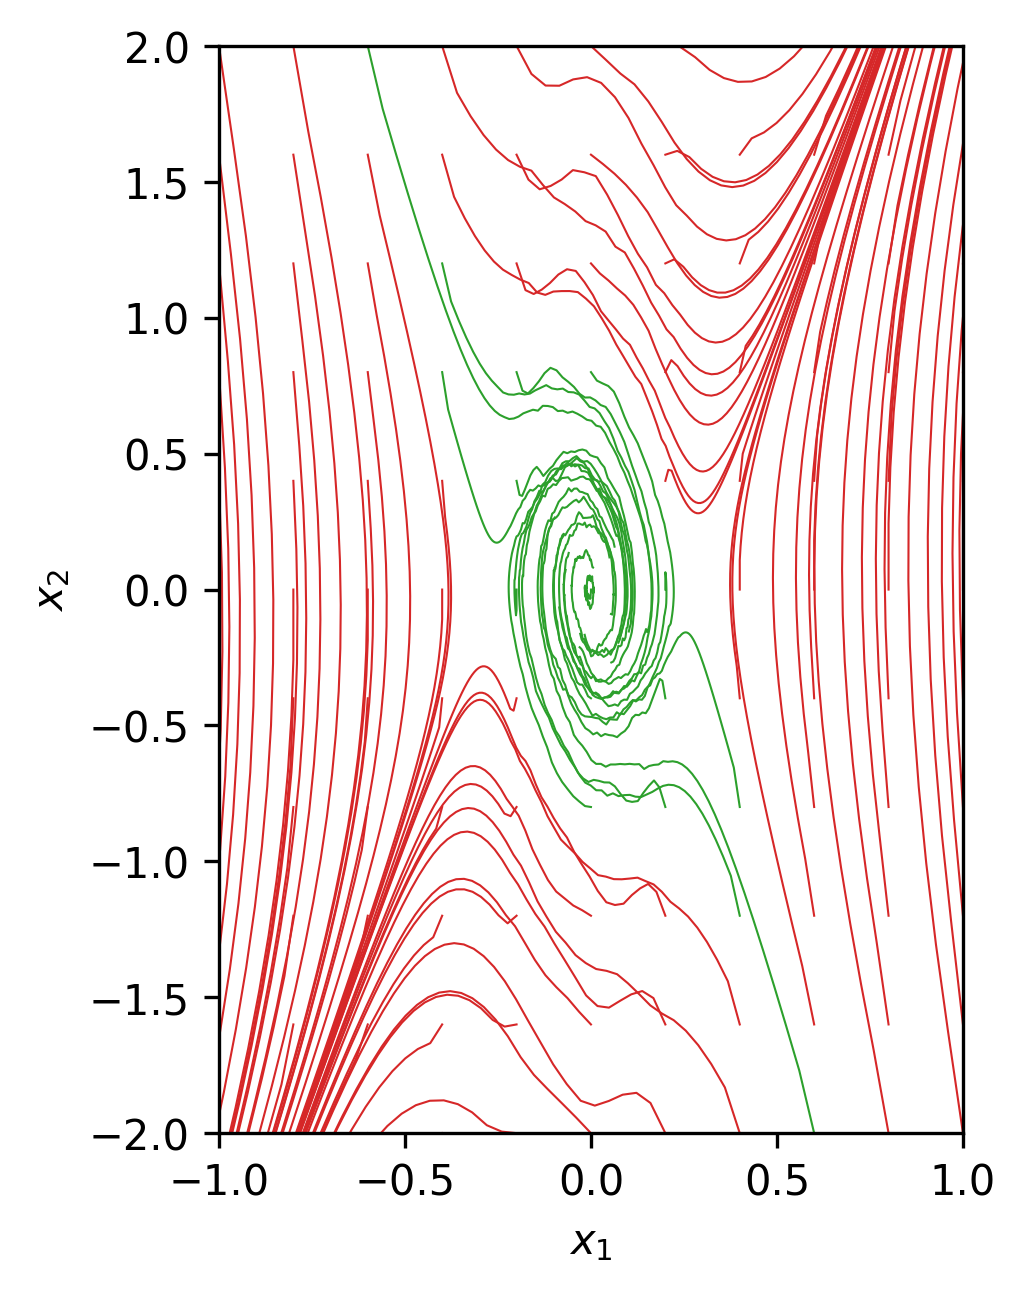

In [36]:
n = 11

xs = np.linspace(-1, 1, n)
ys = np.linspace(-2, 2, n)
horizon = 100

plt.figure(dpi=300, figsize=(3.2, 4.8))
plt.xlim(-1, 1)
plt.ylim(-2, 2)

for x in tqdm(xs):
    for y in ys:
        states = agent.sample_trajectory(env, False, init_state=[x, y], horizon=horizon)['state']
        # print(states.shape)

        if np.linalg.norm(states[-1]) > 0.7:
            c="tab:red"
            # print('RED', states[-1])
        else:
            c="tab:green"
            # continue
        
        plt.plot(states[:, 0], states[:, 1], color=c, linewidth=0.5)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [11]:
agent.rnn._nx

16

In [25]:
x = agent.rnn._W_xi.weight.data
print(x.shape)
x

torch.Size([16, 33])


tensor([[ 0.0493, -0.0649,  0.0911,  0.0351,  0.1155,  0.0777,  0.0292, -0.1494,
         -0.0031, -0.1959,  0.0615,  0.0132, -0.0288,  0.1065,  0.0539,  0.1202,
          0.0216, -0.1484,  0.0149,  0.1435, -0.1134,  0.0471,  0.0137,  0.0058,
          0.0403,  0.0282, -0.0308, -0.1565, -0.1220, -0.0315, -0.2067, -0.0922,
         -0.0410],
        [ 0.1117,  0.0311, -0.1273,  0.0394, -0.1031, -0.0859, -0.1326, -0.0503,
         -0.1203,  0.1114,  0.0369,  0.0365,  0.0496,  0.0911, -0.0283, -0.0218,
          0.0659,  0.1261,  0.0447,  0.1577,  0.0423, -0.0980, -0.0366,  0.1208,
          0.0520,  0.0527,  0.1738,  0.1371, -0.1345, -0.0030,  0.2117,  0.1296,
          0.0914],
        [ 0.0701, -0.1963, -0.0309,  0.0898, -0.1486,  0.1818, -0.1154,  0.0771,
         -0.0213,  0.0230,  0.0169, -0.1882, -0.0055, -0.0870,  0.1535, -0.0154,
         -0.1999,  0.0425,  0.1089, -0.0904,  0.0163,  0.0995, -0.1019, -0.2284,
         -0.0030, -0.1476,  0.0902,  0.0020,  0.1206,  0.1216, -0.1481,

In [26]:
ak = agent.rnn._W_xi.weight.data[:, :agent.rnn._nx]
print(ak.shape)
ak

torch.Size([16, 16])


tensor([[ 0.0493, -0.0649,  0.0911,  0.0351,  0.1155,  0.0777,  0.0292, -0.1494,
         -0.0031, -0.1959,  0.0615,  0.0132, -0.0288,  0.1065,  0.0539,  0.1202],
        [ 0.1117,  0.0311, -0.1273,  0.0394, -0.1031, -0.0859, -0.1326, -0.0503,
         -0.1203,  0.1114,  0.0369,  0.0365,  0.0496,  0.0911, -0.0283, -0.0218],
        [ 0.0701, -0.1963, -0.0309,  0.0898, -0.1486,  0.1818, -0.1154,  0.0771,
         -0.0213,  0.0230,  0.0169, -0.1882, -0.0055, -0.0870,  0.1535, -0.0154],
        [-0.0527, -0.0763,  0.0022, -0.1326,  0.1044,  0.1182,  0.0980,  0.0927,
          0.0983, -0.2054,  0.0588,  0.1722, -0.1320, -0.1242,  0.0251, -0.0673],
        [-0.0661, -0.1713,  0.1026,  0.1262,  0.0985, -0.1239,  0.2143, -0.0281,
         -0.2014, -0.0624,  0.1480,  0.0876, -0.0050,  0.0803, -0.1220,  0.1646],
        [ 0.1607, -0.1741,  0.0556, -0.0611, -0.0950, -0.0294,  0.0227,  0.2095,
         -0.0790, -0.1875,  0.0133, -0.2428,  0.0596,  0.2384,  0.1002, -0.0947],
        [ 0.0702,  0.1

In [20]:
dk1 = agent.rnn._W_u.weight.data[:, agent.rnn._nx:agent.rnn._nx + agent.rnn._nh]
print(dk1.shape)
dk1

torch.Size([1, 16])


tensor([[-0.1224,  0.0575,  0.1750,  0.0984,  0.2157,  0.1785, -0.0697, -0.0760,
          0.2170,  0.1300, -0.1840, -0.0916,  0.0642,  0.1396, -0.0813, -0.0162]])

In [21]:
dk2 = agent.rnn._W_u.weight.data[:, agent.rnn._nx + agent.rnn._nh:]
print(dk2.shape)
dk2

torch.Size([1, 1])


tensor([[-0.0104]])